In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=7758026ae574009a145eb3b1796f779a32f3013c0f344cc1c2c468ed5b685024
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


# Import cummon package

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import wget
import zipfile
from tqdm import tqdm
import os

# Download File

In [ ]:
if os.path.isfile('Chessman-image-dataset.zip'):
    print("File Sudah ada")
else:
    wget.download(
        url='https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip'
    )
    print("\nDownload Selesai")


Download Selesai


# Extract Zipfile

In [ ]:
if os.path.exists('/content/Chessman-image-dataset'):
    print("File Sudah di extract")
else:
    with zipfile.ZipFile('Chessman-image-dataset.zip', mode='r') as zip_file:
        for zf in tqdm(zip_file.infolist(), desc="Extracting"):
            try:
                zip_file.extract(zf)                
            except Exception as e:
                print(e)
    zip_file.close()
    print("Proses extract berhasil")

Extracting: 100%|██████████| 1128/1128 [00:00<00:00, 1296.77it/s]

Proses extract berhasil


### Simple EDA

In [ ]:
path = '/content/Chessman-image-dataset/Chess'
path_dict = {}
for i in os.listdir(path):
    path_dict[i] = os.listdir(os.path.join(path, i))
    print(i, "=> sebanyak ", len(os.listdir(os.path.join(path, i))))

Rook => sebanyak  102
Bishop => sebanyak  87
Pawn => sebanyak  107
King => sebanyak  76
Knight => sebanyak  106
Queen => sebanyak  78


In [ ]:
path_dict.keys()

dict_keys(['Rook', 'Bishop', 'Pawn', 'King', 'Knight', 'Queen'])

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

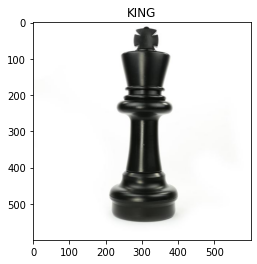

In [ ]:
classes = os.listdir(path)
idx_classes = np.random.randint(0, len(classes))
values = os.listdir(os.path.join(path, classes[idx_classes]))
idx_values = np.random.randint(0,50)
new_path = os.path.join(path, classes[idx_classes])
img = image.load_img(os.path.join(new_path, values[idx_values]))
plt.imshow(img)
plt.title(classes[idx_classes].upper())
plt.show()

### Split data

In [ ]:
def pisah_data(data):

    """Fungsi ini untuk memisahkan data menjadi train set dan validation_set
    dengan urutan hasil return : data_train, data_validasi"""
    panjang_train = int(0.8*len(data))
    panjang_val = int(0.2*len(data))
    selisih =len(data) - (panjang_train + panjang_val)
    print(len(data), " - ( ",panjang_train, " + ", panjang_val," ) = ",selisih)
    if selisih > 0:
        panjang_val +=selisih
    data_train = []
    #memilih data train dari data
    while len(data_train) != panjang_train:
        bantu = np.random.randint(0, (len(data)-1))
        if data[bantu] not in data_train:
            data_train.append(data[bantu])
            del data[bantu]
    #Sisanya Dicopy kedalam Train
    data_validasi = data.copy()
    del data
    print("Panjang train : ",panjang_train)
    print("Panjang validasi : ",panjang_val,"\n")
    return data_train, data_validasi

In [ ]:
dict_train_test = {}
for cls in path_dict.keys():
    dict_train_test[cls] = pisah_data(path_dict[cls])

102  - (  81  +  20  ) =  1
Panjang train :  81
Panjang validasi :  21 

87  - (  69  +  17  ) =  1
Panjang train :  69
Panjang validasi :  18 

107  - (  85  +  21  ) =  1
Panjang train :  85
Panjang validasi :  22 

76  - (  60  +  15  ) =  1
Panjang train :  60
Panjang validasi :  16 

106  - (  84  +  21  ) =  1
Panjang train :  84
Panjang validasi :  22 

78  - (  62  +  15  ) =  1
Panjang train :  62
Panjang validasi :  16 



In [ ]:
dict_train_test

In [ ]:
import shutil

In [ ]:
#Selanjutnya pindahkan ke folder terpisah

#Membuat fungsi untuk membuat folder penyimpanan dan memindahkan data yang telah dipisahkan kedalam folder tersebut
def move(data_train, data_val, lokasi_data, lokasi_train, lokasi_validasi):
  
    """Fungsi ini untuk membuat folder penyimpanan dan 
    memasukan data yang telah dipisahkan dengan folder tersebut"""
     
    #Memeriksa apakan folder sudah ada, jika belum maka tambahkan folder
    if not (os.path.exists(lokasi_train) and os.path.exists(lokasi_validasi)):
        os.makedirs(lokasi_train)
        os.makedirs(lokasi_validasi)
    else:
        print('Folder Sudah ada')
     
    #memindahkan ke folder terpisah
    for i in range(len(data_train)):
        shutil.move(os.path.join(lokasi_data, data_train[i]), os.path.join(lokasi_train, data_train[i]))
     
    #memindahkan ke folder terpisah
    for i in range(len(data_val)):
        shutil.move(os.path.join(lokasi_data, data_val[i]), os.path.join(lokasi_validasi, data_val[i]))

In [ ]:
lokasi_train_set = '/content/Chessman-image-dataset/Chess/train'
lokasi_test_set = '/content/Chessman-image-dataset/Chess/test'

In [ ]:
for cls in path_dict.keys():
    move(
       data_train =  dict_train_test[cls][0],
       data_val = dict_train_test[cls][1],
       lokasi_data = os.path.join(path, cls),
       lokasi_train = os.path.join(lokasi_train_set,cls),
       lokasi_validasi = os.path.join(lokasi_test_set,cls)
    )
    shutil.rmtree(os.path.join(path, cls))

In [ ]:
shutil.rmtree('__MACOSX/')

In [ ]:
train_dir = os.path.join('/content/Chessman-image-dataset/Chess/train')
train_datagen = image.ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 396 images belonging to 6 classes.
Found 41 images belonging to 6 classes.


# Build Simple model

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nAkurasi telah mencapai >90%!")
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=100,
                              verbose=2,
                              callbacks=[callbacks])

Epoch 1/100
50/50 - 39s - loss: 1.9200 - accuracy: 0.1692 - val_loss: 1.7886 - val_accuracy: 0.1951
Epoch 2/100
50/50 - 8s - loss: 1.7917 - accuracy: 0.1818 - val_loss: 1.7855 - val_accuracy: 0.1951
Epoch 3/100
50/50 - 8s - loss: 1.7786 - accuracy: 0.1944 - val_loss: 1.7776 - val_accuracy: 0.1951
Epoch 4/100
50/50 - 8s - loss: 1.7785 - accuracy: 0.2424 - val_loss: 1.6971 - val_accuracy: 0.3171
Epoch 5/100
50/50 - 8s - loss: 1.7206 - accuracy: 0.2828 - val_loss: 1.7436 - val_accuracy: 0.2439
Epoch 6/100
50/50 - 8s - loss: 1.6976 - accuracy: 0.2904 - val_loss: 1.6815 - val_accuracy: 0.3659
Epoch 7/100
50/50 - 8s - loss: 1.6777 - accuracy: 0.3106 - val_loss: 1.6822 - val_accuracy: 0.2927
Epoch 8/100
50/50 - 8s - loss: 1.6456 - accuracy: 0.2980 - val_loss: 1.6684 - val_accuracy: 0.3902
Epoch 9/100
50/50 - 8s - loss: 1.6085 - accuracy: 0.3561 - val_loss: 1.6286 - val_accuracy: 0.4634
Epoch 10/100
50/50 - 8s - loss: 1.5568 - accuracy: 0.4015 - val_loss: 1.5998 - val_accuracy: 0.3902
Epoch 11

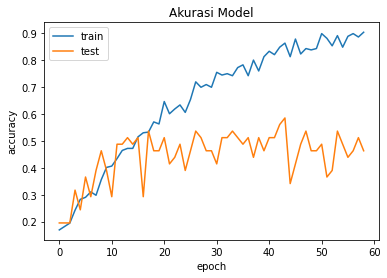

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

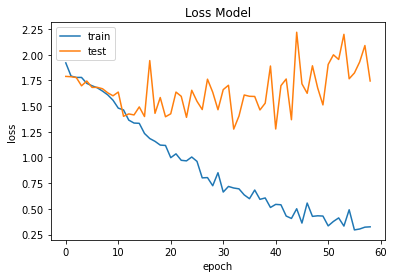

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Using Transfer learning 
## ResNet Architecture

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model2 = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model2.layers[0].trainable = False

234561536/234545216 [==============================] - 3s 0us/step


In [ ]:
model2.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model2.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    verbose=2,
                    callbacks=[callbacks])

Epoch 1/50
50/50 - 27s - loss: 12.2857 - accuracy: 0.4394 - val_loss: 3.5097 - val_accuracy: 0.6098
Epoch 2/50
50/50 - 11s - loss: 2.6537 - accuracy: 0.6717 - val_loss: 1.6211 - val_accuracy: 0.5610
Epoch 3/50
50/50 - 11s - loss: 1.4188 - accuracy: 0.7374 - val_loss: 1.1645 - val_accuracy: 0.7805
Epoch 4/50
50/50 - 11s - loss: 0.8444 - accuracy: 0.7929 - val_loss: 1.1098 - val_accuracy: 0.7561
Epoch 5/50
50/50 - 11s - loss: 0.7736 - accuracy: 0.8182 - val_loss: 1.0561 - val_accuracy: 0.7561
Epoch 6/50
50/50 - 11s - loss: 1.1166 - accuracy: 0.8232 - val_loss: 1.1162 - val_accuracy: 0.7317
Epoch 7/50
50/50 - 11s - loss: 0.6065 - accuracy: 0.8561 - val_loss: 0.9488 - val_accuracy: 0.7317
Epoch 8/50
50/50 - 11s - loss: 0.7505 - accuracy: 0.8586 - val_loss: 1.1424 - val_accuracy: 0.7073
Epoch 9/50
50/50 - 11s - loss: 0.4873 - accuracy: 0.8763 - val_loss: 0.7426 - val_accuracy: 0.7805
Epoch 10/50
50/50 - 11s - loss: 0.4057 - accuracy: 0.9091 - val_loss: 1.0529 - val_accuracy: 0.6829
Epoch 11